# Imports and setting up viz

In [1]:
import numpy as np
import netCDF4 as nc
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
import cartopy.crs as ccrs
import matplotlib as mpl
from matplotlib.colors import ListedColormap
%matplotlib inline

In [2]:
plt.rcParams.update(
        {
            'figure.facecolor': 'white',
            'axes.facecolor': 'white',
            'font.size': 12,
            'figure.dpi': 72.0,
            'xtick.direction': 'in',
            'ytick.direction': 'in',
            'xtick.major.size': 5.0,
            'xtick.minor.size': 2.5,
            'ytick.major.size': 5.0,
            'ytick.minor.size': 2.5,
            'xtick.minor.visible': True,
            'ytick.minor.visible': True,
            'axes.grid': True,
            'axes.titlesize': 'larger',
            'axes.labelsize': 'larger',
            'grid.color': 'dimgray',
            'grid.linestyle': '-',
            'grid.alpha': 0.3,
            'axes.prop_cycle': cycler(
                color=[
                    '#0C5DA5',
                    '#FF9500',
                    '#00B945',
                    '#FF2C00',
                    '#845B97',
                    '#474747',
                    '#9E9E9E',
                ]
            ) * cycler(alpha=[0.8]),
            'scatter.marker': 'x',
            'lines.linewidth': 1.0,
        })

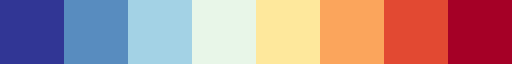

In [3]:
#define centered colorbar
emb = ListedColormap(mpl.colormaps['RdYlBu_r'](np.linspace(0, 1, 8)))
emb

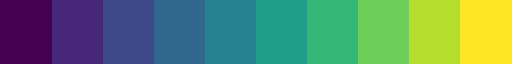

In [4]:
#define progressive colorbar
myvir = ListedColormap(mpl.colormaps['viridis'](np.linspace(0, 1, 10)))
myvir

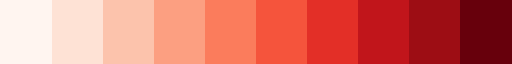

In [5]:
#define progressive colorbar
reds = ListedColormap(mpl.colormaps['Reds'](np.linspace(0, 1, 10)))
reds

# Load files

Various files for topography, to compare how topoindex are calculated and aggregated

In [6]:
filename='../../../data/topography_files/routing.nc'
halfdeg = xr.open_dataset(filename)

filename='../../../data/topography_files/routing_simple.nc'
simple = xr.open_dataset(filename)

filename='../../../data/topography_files/routing_ext_merit.nc'
merit = xr.open_dataset(filename)

In [7]:
halfdeg

<xarray.Dataset>
Dimensions:  (y: 360, x: 720)
Dimensions without coordinates: y, x
Data variables:
    nav_lon  (y, x) float32 ...
    nav_lat  (y, x) float32 ...
    trip     (y, x) float32 ...
    basins   (y, x) float32 ...
    topoind  (y, x) float32 ...

In [8]:
simple

<xarray.Dataset>
Dimensions:          (lat: 360, lon: 720)
Coordinates:
  * lat              (lat) float32 89.75 89.25 88.75 ... -88.75 -89.25 -89.75
  * lon              (lon) float32 -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
Data variables:
    trip             (lat, lon) float32 ...
    trip_extended    (lat, lon) float32 ...
    topoind          (lat, lon) float32 ...
    basins           (lat, lon) float32 ...
    basins_extended  (lat, lon) float32 ...
Attributes:
    name:         routing_simple
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2022-Feb-16 12:19:07 GMT
    uuid:         b04f64e8-be96-416d-a197-5230bb388fe4
    description:  Extend of the standard routing.nc file to route riverflow t...

In [9]:
merit

<xarray.Dataset>
Dimensions:        (lat: 10800, lon: 21600)
Coordinates:
  * lat            (lat) float32 89.99 89.97 89.96 ... -89.96 -89.97 -89.99
  * lon            (lon) float32 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Data variables:
    trip           (lat, lon) float32 ...
    trip_extended  (lat, lon) float32 ...
    topoind        (lat, lon) float32 ...
Attributes:
    name:         routing_ext_50km
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2023-Jul-27 18:58:51 GMT
    uuid:         37660c29-b90e-4bd7-8125-6c4b10f4987c

# Maps

Text(0.5, 1.0, 'trip')

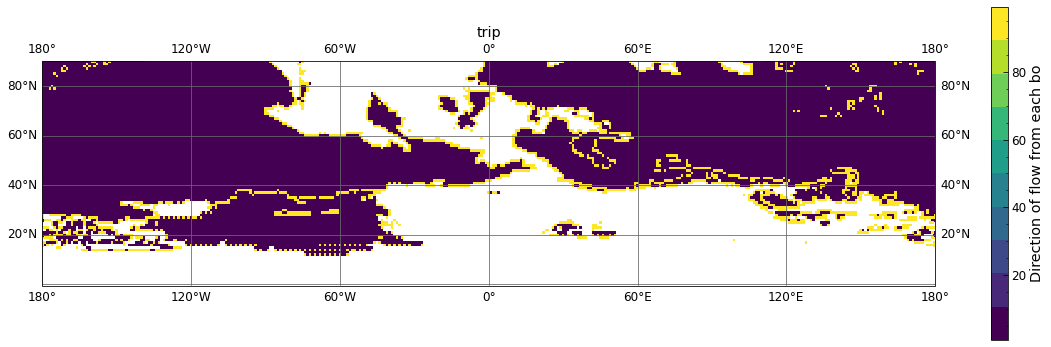

In [41]:
#Display map of var for ds
ds = halfdeg
var='trip'
plotvar = ds[var]
fig = plt.figure(figsize=(20, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
#use colormap reds
plotvar.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=myvir)
plt.title(var)


# Distribution

Text(0.5, 1.0, 'Merit')

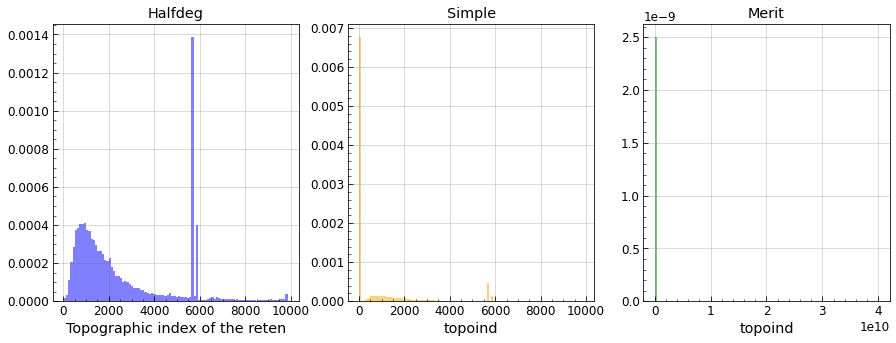

In [35]:
#plot distribution of topoind normalized as probability density function
ds1 = halfdeg
ds2 = simple
ds3 = merit
valmin=None
valmax=None
var = 'topoind'

#plot separately
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ds1[var].plot.hist(density=True, bins=100, ax=ax[0], alpha=0.5, color='blue')#, range=(valmin, valmax))
ds2[var].plot.hist(density=True, bins=100, ax=ax[1], alpha=0.5, color='orange')#, range=(valmin, valmax))
(ds3[var]/25).plot.hist(density=True, bins=100, ax=ax[2], alpha=0.5, color='green')#, range=(valmin, valmax))
ax[0].set_title('Halfdeg')
ax[1].set_title('Simple')
ax[2].set_title('Merit')

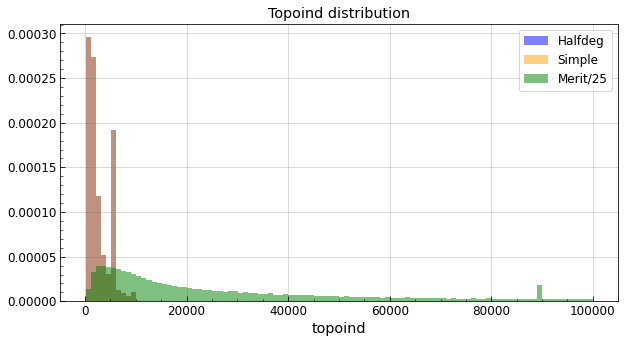

In [32]:
#plot distribution of topoind normalized as probability density function
ds1 = halfdeg
ds2 = simple
ds3 = merit
valmin=101
valmax=100000
var = 'topoind'

#plot them on one plot
fig, ax = plt.subplots(figsize=(10, 5))
ds1[var].plot.hist(density=True, bins=100, ax=ax, alpha=0.5, color='blue', range=(valmin, valmax))
ds2[var].plot.hist(density=True, bins=100, ax=ax, alpha=0.5, color='orange', range=(valmin, valmax))
(ds3[var]).plot.hist(density=True, bins=100, ax=ax, alpha=0.5, color='green', range=(valmin, valmax))
ax.set_title('Topoind distribution')
ax.legend(['Halfdeg', 'Simple', 'Merit/25'])